# Function Approximation using Neural Networks

## Approximating Non-linear Functions
Imagine a tool so versatile that it can learn to recognize patterns, make decisions, and even mimic human-like reasoning. This tool isn’t a product of science fiction, but a reality in the world of computer science known as a [**neural network**](https://en.wikipedia.org/wiki/Neural_network_(machine_learning)). At its core, a neural network is inspired by the intricate web of neurons in our brains, but instead of processing thoughts and memories, it processes data and learns patterns.

As [**universal function approximators**](https://en.wikipedia.org/wiki/Universal_approximation_theorem), neural networks combine linear transformations with non-linear activation functions, gaining the ability to approximate any continuous function. This powerful combination allows them to model intricate patterns and relationships in data, making them a cornerstone of deep learning.

But why is this capability so significant? In the vast realm of data-driven tasks, from voice recognition to predicting weather patterns, the underlying relationships are often complex and non-linear. Traditional linear models fall short in capturing these intricacies. Neural networks, with their layered architecture and non-linear activation functions, rise to the challenge, offering a flexible and powerful approach to model these relationships.

Let’s use a simple example to illustrate the power of combining linear and non-linear layers.

Suppose we want to approximate the function $f(x)=x^{2}$ using a neural network. This is a simple non-linear function. If we use only linear layers, our network won’t be able to approximate this function well. But by introducing non-linearity, we can achieve a good approximation.

## 1. Using only Linear Layers

Let's first try to approximate $f(x)=x^{2}$ using only linear layers.

**Creating the data:**

In [ ]:
import torch
import torch.nn as nn

# seed for reproducibility
torch.manual_seed(42)

# create data
x = torch.unsqueeze(torch.linspace(-2, 2, 1000), dim=1)
y = x.pow(2)

**Visualizing the data for the function $f(x)=x^{2}$:**

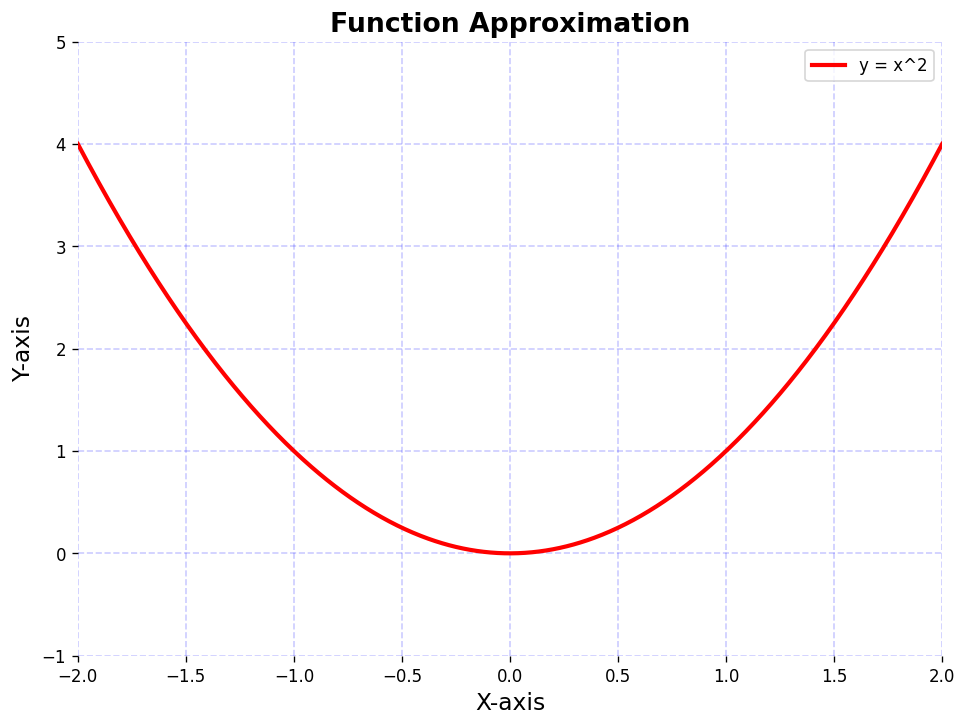

In [3]:
from implicitnet.plotting import plot_function

plot_function(x, y)

**Defining the linear neural network:**

In [4]:
# linear model with one hidden layer
class LinearModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(LinearModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

**Training the neural network:**

In [5]:
# train the model
linear_model = LinearModel(input_dim=1, hidden_dim=20, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(linear_model.parameters(), lr=0.01)

losses, preds = [], []
training_epochs = 100
for epoch in range(training_epochs + 1):
    outputs = linear_model(x)
    loss = criterion(outputs, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss)
    preds.append(linear_model(x).detach().numpy())

# model predictions
final_pred = linear_model(x).detach().numpy()

**Model predictions:**

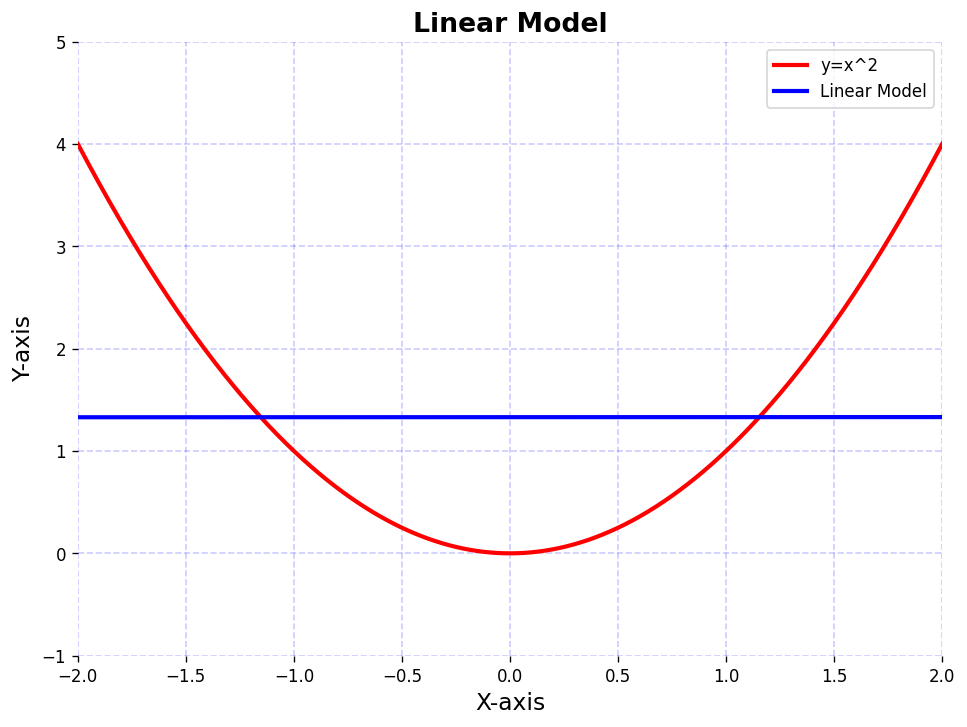

In [6]:
from implicitnet.plotting import plot_model

plot_model(x=x, y=y, predicted=final_pred)

**Plotting the animation:**

In [7]:
from implicitnet.plotting import plot_animation

predictions = {}
n_iters = list(range(0, 101))
for epoch in n_iters:
    predictions[epoch] = preds[epoch]

plot_animation(
    x=x,
    y=y,
    preds=predictions,
    file_name="linear",
    folder_name="linear_plots",
)

In [9]:
import os
import imageio

# get paths and create directories
path = os.path.abspath(os.path.join(os.getcwd(), ".."))
plots_dir = os.path.join(path, "plots", "linear_plots")
animation_dir = os.path.join(path, "animations")
if not os.path.exists(animation_dir):
    os.makedirs(animation_dir)

# create animation
frames = []
for epoch in n_iters:
    image = imageio.v2.imread(f"{plots_dir}/linear_{epoch}.png")
    frames.append(image)

imageio.mimsave(
    f"{animation_dir}/linear_animation.gif",  # output gif
    frames,  # array of input frames
    duration=64,  # optional: frames per second
    loop=0,  # loop the gif
)

**Visualizing the learning process:**

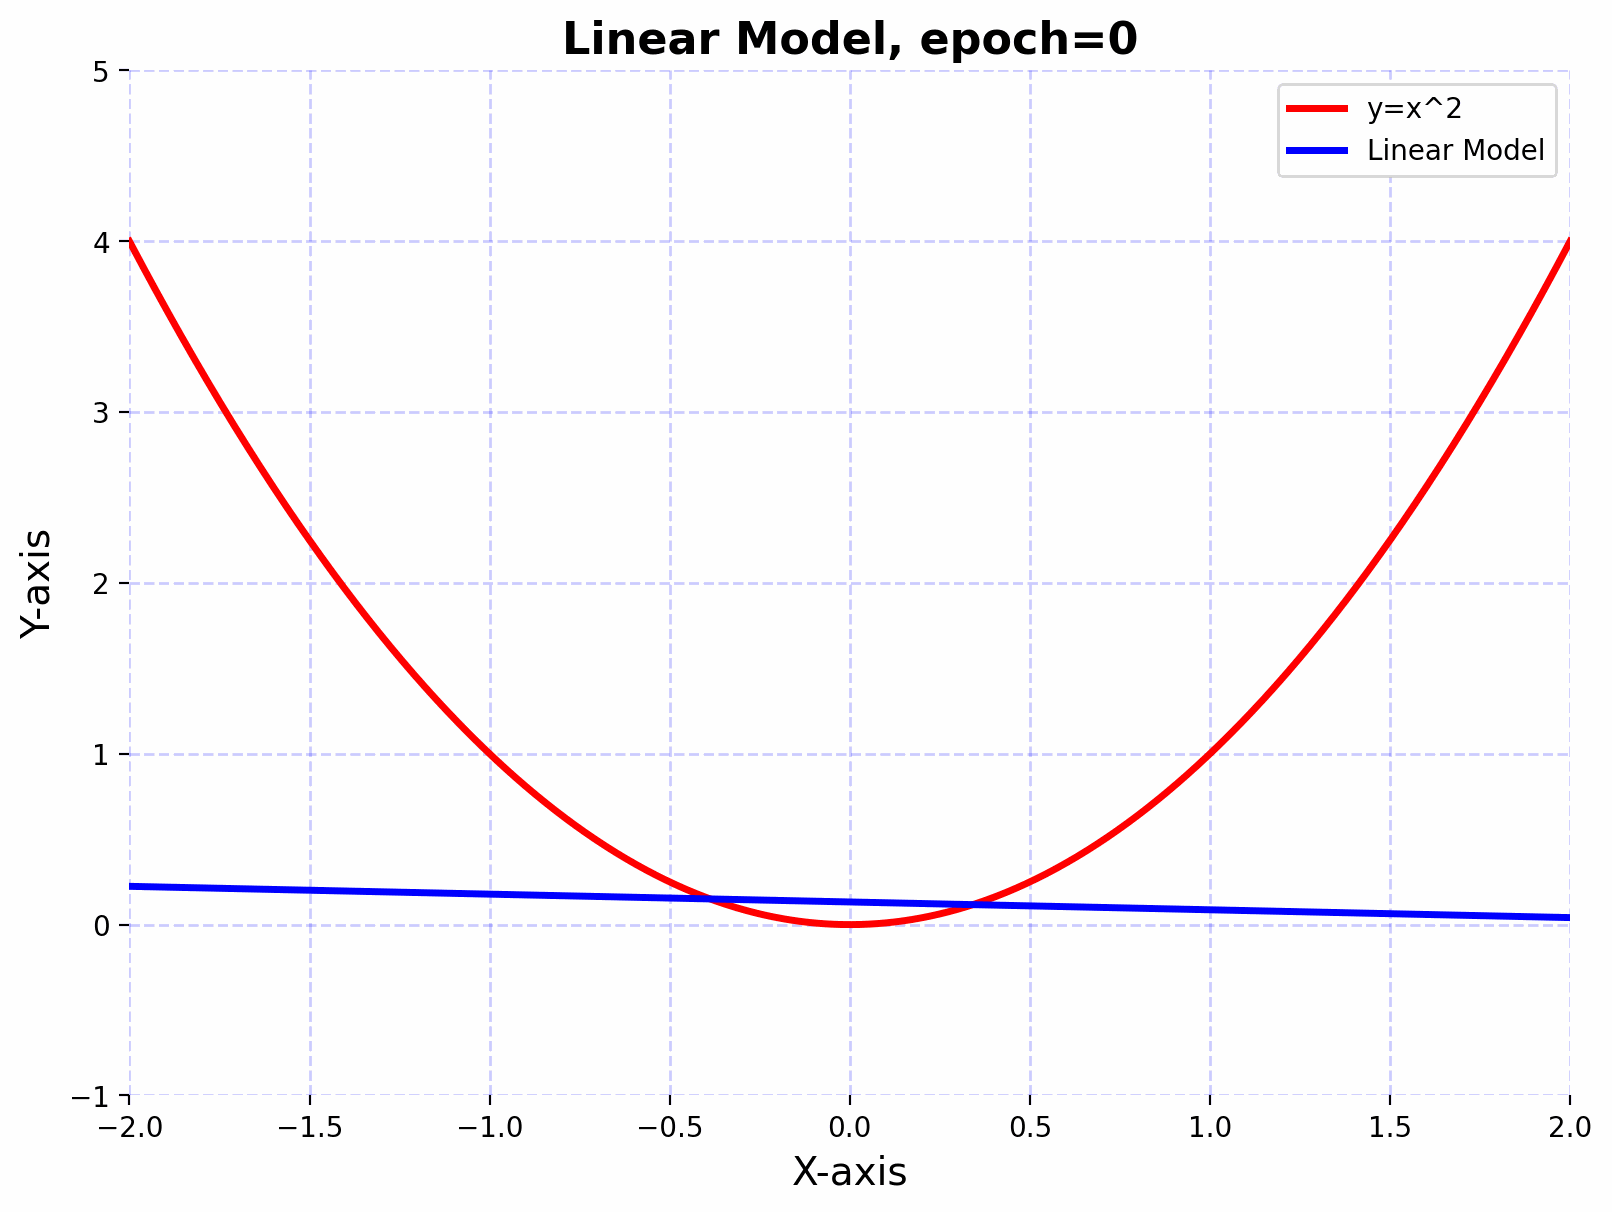

In [15]:
from IPython.display import Image

Image(filename="../animations/linear_animation.gif")